# Description of the breast lesion deep learning project

## Motivation and notes

## Publications data sources

Al-Dhabyani, W., Gomaa, M., Khaled, H., & Fahmy, A. (2019). Dataset of breast ultrasound images. Data in brief, 28, 104863. https://doi.org/10.1016/j.dib.2019.104863

Pawłowska, A., Ćwierz-Pieńkowska, A., Domalik, A., Jaguś, D., Kasprzak, P., Matkowski, R., Fura, Ł., Nowicki, A., & Zolek, N. (2024). A Curated Benchmark Dataset for Ultrasound Based Breast Lesion Analysis (Breast-Lesions-USG) (Version 1) [dataset]. The Cancer Imaging Archive. https://doi.org/10.7937/9WKK-Q141

**the following data is not included yet**

A. Abbasian Ardakani, A. Mohammadi, M. Mirza-Aghazadeh-Attari, U.R. Acharya, An open-access breast lesion ultrasound image database‏: Applicable in artificial intelligence studies, Computers in Biology and Medicine, 152 (2023) 106438. https://doi.org/10.1016/j.compbiomed.2022.106438



In [ ]:
url4 = "https://qamebi.com/wp-content/uploads/2022/11/Benign.zip" #image, mask and masked image file .bmp files?
url5 = "https://qamebi.com/wp-content/uploads/2022/11/Malignant.zip"

# Loading and organizing data

In [2]:
import os
import shutil
import requests
from zipfile import ZipFile
from tqdm import tqdm

url1 = "https://scholar.cu.edu.eg/Dataset_BUSI.zip"
url2 = "https://www.cancerimagingarchive.net/wp-content/uploads/BrEaST-Lesions_USG-images_and_masks-Dec-15-2023.zip"
url3 = "https://www.cancerimagingarchive.net/wp-content/uploads/BrEaST-Lesions-USG-clinical-data-Dec-15-2023.xlsx"
data_dir = "data"

os.makedirs(data_dir, exist_ok=True)  # only created if does not exist

response1 = requests.get(url1, stream=True, verify=False)
zip_file_path1 = os.path.join(data_dir, "Dataset_BUSI.zip")
with open(zip_file_path1, "wb") as zip_file:
    total_size = int(response1.headers.get('content-length', 0))
    with tqdm(total=total_size, unit='B', unit_scale=True, desc=os.path.basename(zip_file_path1)) as pbar:
        for data in response1.iter_content(chunk_size=1024):
            pbar.update(len(data))
            zip_file.write(data)

with ZipFile(zip_file_path1, "r") as zip_ref:
    zip_ref.extractall(data_dir)

# put images into one directory
target_directory = os.path.join(data_dir, "Dataset_BUSI_with_GT")
os.makedirs(target_directory, exist_ok=True)
source_extracted_folder = os.path.join(data_dir, "Dataset_BUSI_with_GT")
categories = ['benign', 'malignant', 'normal']
for category in categories:
    subfolder_path = os.path.join(source_extracted_folder, category)
    for file in os.listdir(subfolder_path):
        src_path = os.path.join(subfolder_path, file)
        dest_path = os.path.join(target_directory, file)
        shutil.move(src_path, dest_path)
    os.rmdir(subfolder_path)

os.remove(zip_file_path1)

response2 = requests.get(url2, stream=True, verify=False)
zip_file_path2 = os.path.join(data_dir, "BrEaST-Lesions_USG-images_and_masks-Dec-15-2023.zip")
with open(zip_file_path2, "wb") as zip_file:
    total_size = int(response2.headers.get('content-length', 0))
    with tqdm(total=total_size, unit='B', unit_scale=True, desc=os.path.basename(zip_file_path2)) as pbar:
        for data in response2.iter_content(chunk_size=1024):
            pbar.update(len(data))
            zip_file.write(data)

with ZipFile(zip_file_path2, "r") as zip_ref:
    zip_ref.extractall(data_dir)

os.remove(zip_file_path2)

response3 = requests.get(url3, stream=True, verify=False)
file_path3 = os.path.join(data_dir, "BrEaST-Lesions-USG-clinical-data-Dec-15-2023.xlsx")
with open(file_path3, "wb") as file:
    total_size = int(response3.headers.get('content-length', 0))
    with tqdm(total=total_size, unit='B', unit_scale=True, desc=os.path.basename(file_path3)) as pbar:
        for data in response3.iter_content(chunk_size=1024):
            pbar.update(len(data))
            file.write(data)

print("Done and saved to:", data_dir)

/Users/KT/.pyenv/versions/3.10.6/envs/breast_lesion_DL/lib/python3.10/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'scholar.cu.edu.eg'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
Dataset_BUSI.zip: 100%|██████████| 206M/206M [04:16<00:00, 802kB/s] 
/Users/KT/.pyenv/versions/3.10.6/envs/breast_lesion_DL/lib/python3.10/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.cancerimagingarchive.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
BrEaST-Lesions_USG-images_and_masks-Dec-15-2023.zip: 100%|██████████| 69.9M/69.9M [00:07<00:00, 9.48MB/s]
/Users/KT/.pyenv/versions/3.10.6/envs/breast_lesion_DL/lib/python3.10/site-packages/urllib3/connecti

Done and saved to: data


In [4]:
import numpy as np
import pandas as pd
from PIL import Image

# Paths
source_directory1 = 'data/BrEaST-Lesions_USG-images_and_masks'
source_directory2 = 'data/Dataset_BUSI_with_GT'
excel_path = 'data/BrEaST-Lesions-USG-clinical-data-Dec-15-2023.xlsx'
target_directory = 'data/Ordered_images/' #make dir if does not exist!


# Load from Excel
df = pd.read_excel(excel_path, engine='openpyxl')
df_filtered = df[df['Classification'].str.lower() != 'normal']

# Create target directories for classes
for cls in df_filtered['Classification'].unique():
    class_dir = os.path.join(target_directory, cls)
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)

def apply_mask_and_save(image_path, mask_path, save_path):
    image = Image.open(image_path).convert("L")
    mask = Image.open(mask_path).convert("L")
    image_array = np.array(image)
    mask_array = np.array(mask)
    image_array[mask_array == 0] = 0
    masked_image = Image.fromarray(image_array)
    masked_image.save(save_path)

# Organize images and masks from the first directory
data_records = []
for _, row in df_filtered.iterrows():
    image_filename = row['Image_filename']
    mask_filename = row['Mask_tumor_filename']
    classification = row['Classification'].strip()
    image_path = os.path.join(source_directory1, image_filename)
    mask_path = os.path.join(source_directory1, mask_filename)
    save_path = os.path.join(target_directory, classification, image_filename)
    if os.path.exists(image_path) and os.path.exists(mask_path):
        apply_mask_and_save(image_path, mask_path, save_path)
    data_records.append({'filename': image_filename, 'classification': classification})

# process images from the second directory
for entry in os.listdir(source_directory2):
    if entry.endswith('.png') and not '_mask' in entry:
        base_name = entry[:-4]  # remove ".png"
        mask_filename = f"{base_name}_mask.png"
        full_image_path = os.path.join(source_directory2, entry)
        full_mask_path = os.path.join(source_directory2, mask_filename)

        # skip files with "normal" in the filename
        if 'normal' in base_name:
            continue

        if os.path.exists(full_mask_path):  # check if mask exists
            # Classify as 'benign' or 'malignant' based on filename
            if 'benign' in base_name:
                classification = 'benign'
            else:
                classification = 'malignant'
            save_path = os.path.join(target_directory, classification, entry)
            apply_mask_and_save(full_image_path, full_mask_path, save_path)
            data_records.append({'filename': entry, 'classification': classification})

# combine all into df
combined_df = pd.DataFrame(data_records)
combined_df.head()

,filename,classification
0,case001.png,benign
1,case002.png,benign
2,case003.png,benign
3,case004.png,benign
4,case005.png,malignant


In [5]:
import os
import shutil
import random

def move_random_images(source_dir, target_dir, num_images):
    # Ensure target directory exists
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    # List all files in the source directory
    all_files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

    # Check if the directory has enough images
    if len(all_files) < num_images:
        raise ValueError(f"Not enough images in {source_dir} to sample {num_images}")

    # Randomly select images
    selected_files = random.sample(all_files, num_images)

    # Move selected images to the target directory
    for file_name in selected_files:
        shutil.move(os.path.join(source_dir, file_name), os.path.join(target_dir, file_name))
    print(f"Moved {num_images} images from {source_dir} to {target_dir}")

# Paths to the source directories
benign_source = 'data/Ordered_images/benign'
malignant_source = 'data/Ordered_images/malignant'

# Paths to the target directories
benign_target = 'data/Test_data/benign'
malignant_target = 'data/Test_data/malignant'

# Number of images to move
num_images_to_move = 50

# Move images for benign and malignant cases
move_random_images(benign_source, benign_target, num_images_to_move)
move_random_images(malignant_source, malignant_target, num_images_to_move)


Moved 50 images from data/Ordered_images/benign to data/Test_data/benign
Moved 50 images from data/Ordered_images/malignant to data/Test_data/malignant


# Data exploration 

## Plotting example images

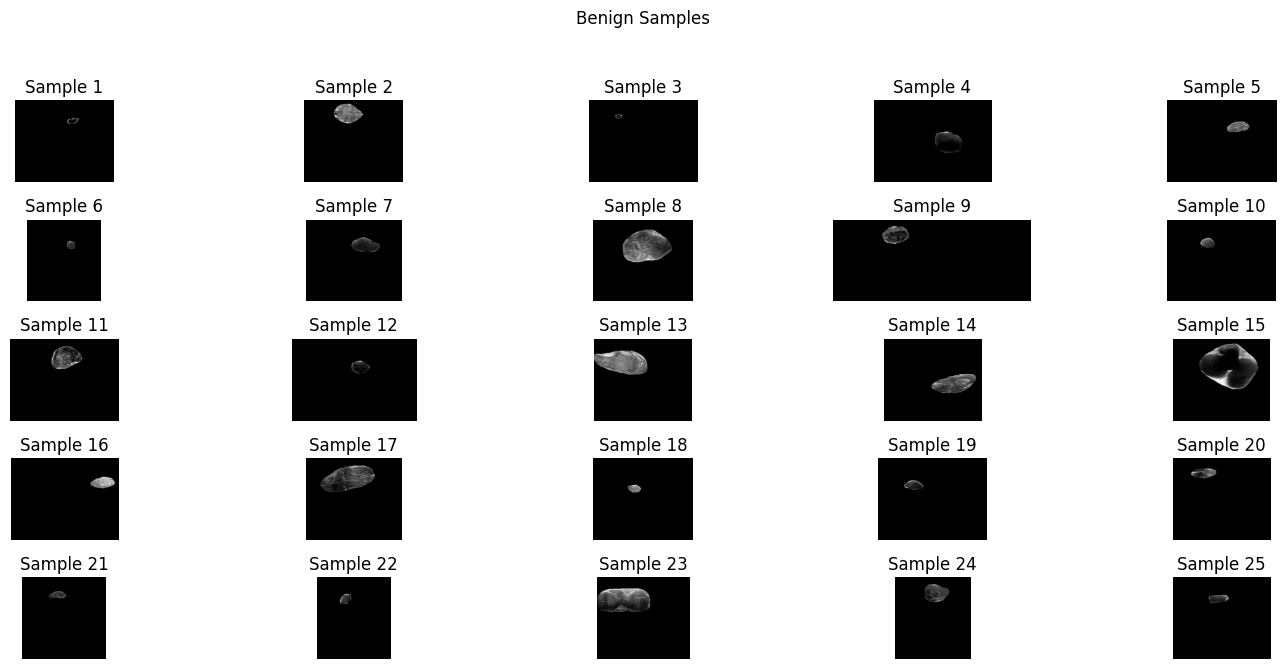

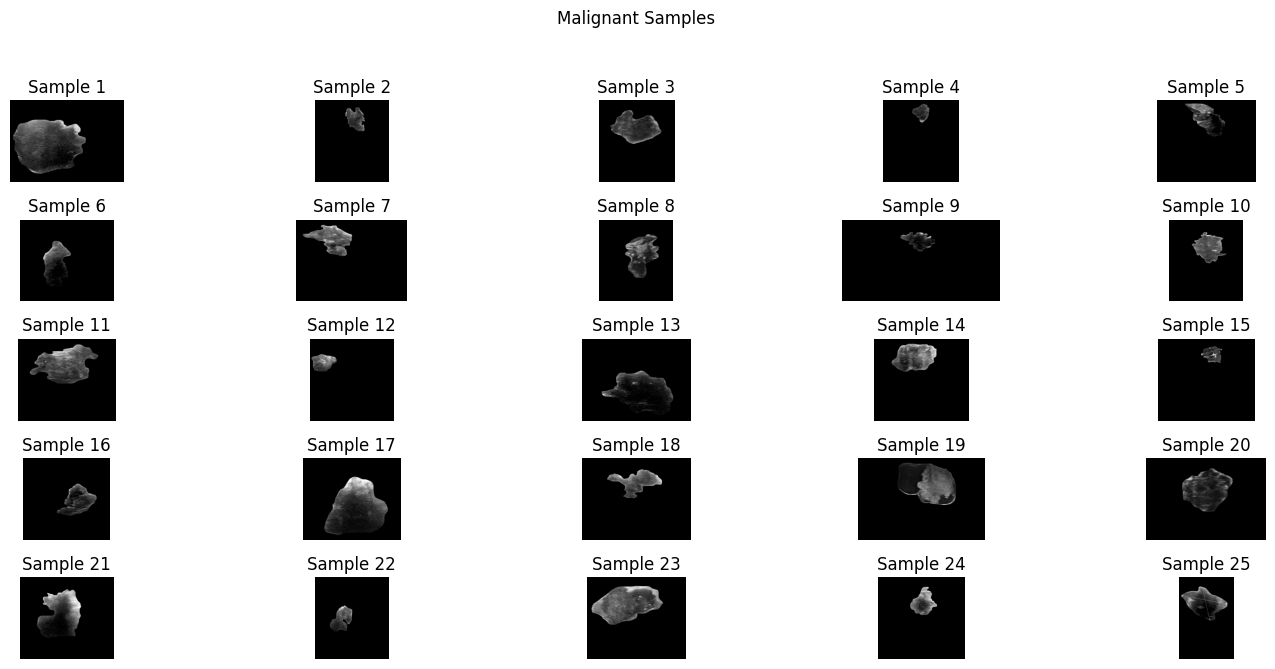

In [14]:
import matplotlib.pyplot as plt
import os
from PIL import Image

def plot_class_samples(base_path, class_name, num_samples=10):
    plt.figure(figsize=(15, 7))
    class_folder = os.path.join(base_path, class_name)
    image_files = [os.path.join(class_folder, f) for f in os.listdir(class_folder) if f.endswith('.png')]

    for i in range(min(num_samples, len(image_files))):
        img_path = image_files[i]
        img = Image.open(img_path).convert('L')  # Load in grayscale
        ax = plt.subplot(5, 5, i + 1)  # Adjust subplot grid for 10 images: 2 rows and 5 columns
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Sample {i + 1}")
        ax.axis('off')

    plt.suptitle(f"{class_name.capitalize()} Samples")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

base_path = 'data/Ordered_images/'

plot_class_samples(base_path, 'benign', num_samples=25)

plot_class_samples(base_path, 'malignant', num_samples=25)

## Is there a class imbalance? 

In [15]:
combined_df['classification'].value_counts()

classification
benign       591
malignant    308
Name: count, dtype: int64

# Model building

## Loading data with keras.preprocessing function (tip from Vlad)

In [5]:
import tensorflow as tf

base_path = 'data/Ordered_images/'

# parameters for the dataset generation
batch_size = 32
img_height = 224 # what should the input size be? #224
img_width = 224   # ?

# Create training dataset from directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    base_path,
    labels='inferred',
    label_mode='int',   # Labels are returned as integers
    class_names=['benign', 'malignant'], # class names
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(img_height, img_width),  # resize images to the specified size
    shuffle=True,        # shuffles the data
    seed=123,            # seed for shuffling and transformations
    validation_split=0.2,  # image proportion for validation
    subset='training',
)

# Crreating validation set
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    base_path,
    labels='inferred',
    label_mode='int',
    class_names=['benign', 'malignant'],
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
)

Found 899 files belonging to 2 classes.
Using 720 files for training.
Found 899 files belonging to 2 classes.
Using 179 files for validation.


## Data preprocessing and augmentation 

## Edge detection: is it true that benign lesions are rather round and malignant ones are rather irregularly shaped? 

## Inspect Preprocessed Images?

## Baseline model

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

img_height = 180
img_width = 180

# simple CNN model
def make_model(input_shape):
    model = models.Sequential([
        layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),

        # Data augmentation layers
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),

        # First conv block
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),  # Dropout layer added

        # Second conv block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),  # Dropout layer added

        # Third conv block
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),  # Dropout layer added

        # Dense layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Increased dropout for dense layer
        layers.Dense(2, activation='sigmoid')
    ])
    return model

# Create the model
model = make_model((img_height, img_width, 1))  # '1' for grayscale

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Training the model
history = model.fit(
    dataset,
    validation_data=validation_dataset,
    epochs=10
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 1)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 180, 180, 1)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 180, 180, 1)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 180, 180, 1)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                  

In [15]:
# VGG16 version
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

img_height = 224
img_width = 224

def make_model(input_shape):
    # Load VGG16 without the top layer (fully connected layers)
    base_model = VGG16(include_top=False, input_shape=(input_shape[0], input_shape[1], 3), weights='imagenet')

    # Freeze the layers of the VGG16 model to prevent updating weights during training
    for layer in base_model.layers:
        layer.trainable = False

    model = models.Sequential([
        # Convert grayscale images to RGB
        layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x), input_shape=(img_height, img_width, 1)),

        base_model,

        # Additional layers on top of VGG16
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')  # Adjust according to your number of classes
    ])

    return model

# Create the model
model = make_model((img_height, img_width, 1))  # Keep '1' for grayscale, and convert to '3' in the Lambda layer

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Training the model
history = model.fit(
    dataset,
    epochs=10,
    validation_data=validation_dataset
)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_4 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 25088)             0         
                                                                 
 dense_16 (Dense)            (None, 128)               3211392   
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17,926,209
Trainable params: 3,211,521
N

KeyboardInterrupt: 

In [9]:
import matplotlib.pyplot as plt

def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

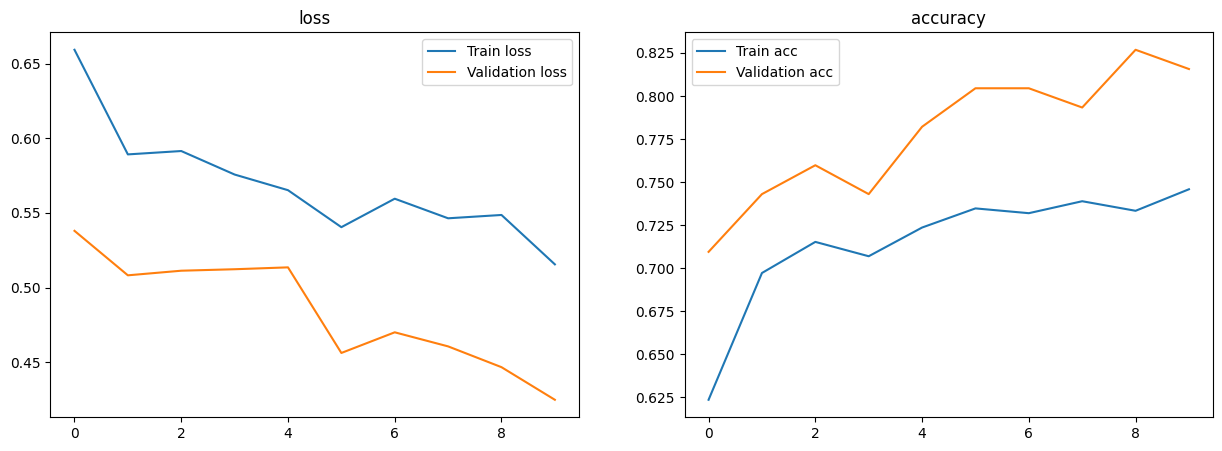

In [12]:
plot_history(history)